# Classification2 (Decision Tree、Random Forest、XGboost)

### 参考 :  
決定木など : https://spjai.com/regression-tree/  
ランダムフォレスト : http://neuro-educator.com/ml6/  
XGboost : https://qiita.com/msrks/items/e3e958c04a5167575c41,  http://tekenuko.hatenablog.com/entry/2016/09/22/220814 

---

In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import ensemble, metrics, preprocessing, cross_validation, tree #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


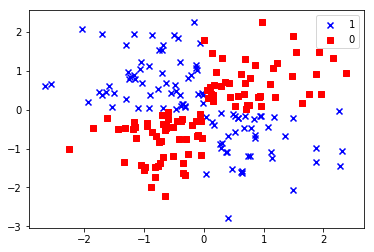

In [2]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

---

# Decision Tree

決定木学習とはデータの応じて下の図のような決定木を構成し、分類を行う機械学習の手法  
決定木学習は、データの種類に応じて決定木を成長させていく  
一般的に精度の高い手法ではない...

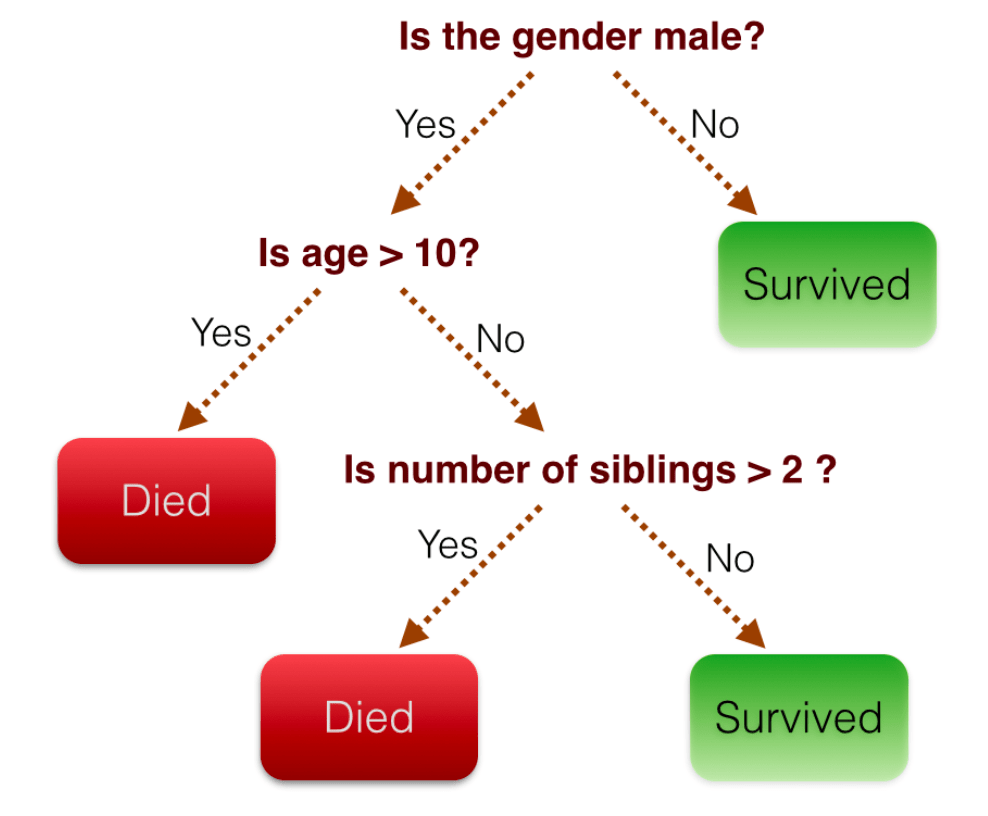

In [3]:
from IPython.display import Image, display_png
display_png(Image("./images/decision.png"))

http://qiita.com/yshi12/items/6d30010b353b084b3749

評価関数は下の図の通り

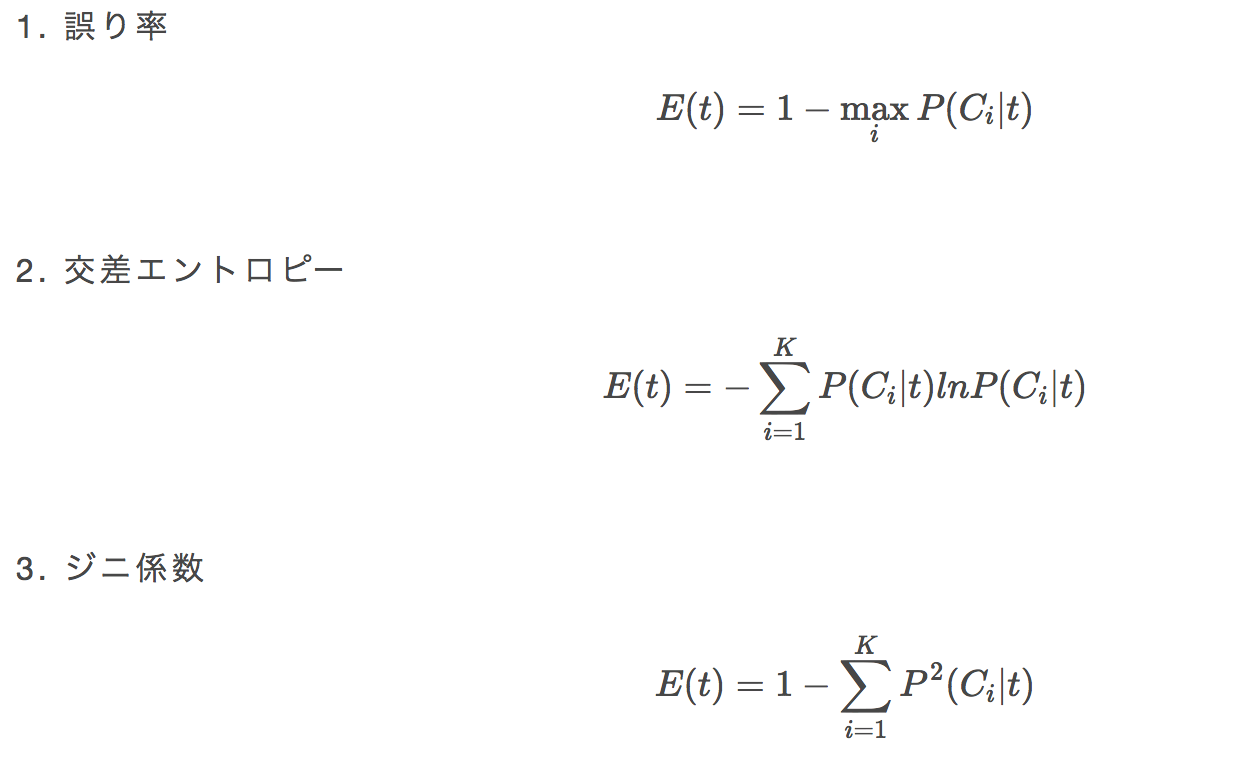

In [4]:
clf_result = tree.DecisionTreeClassifier(random_state=0, criterion='entropy') 
clf_result = clf_result.fit(X_std, z)

from IPython.display import Image, display_png
display_png(Image("./images/loss1.png"))

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [5]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.974736842105
正解率の標準偏差 =  0.0252741204285


In [6]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())
 
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

平均正解率 =  0.974736842105
正解率の標準偏差 =  0.0252741204285
正答率 =  0.95


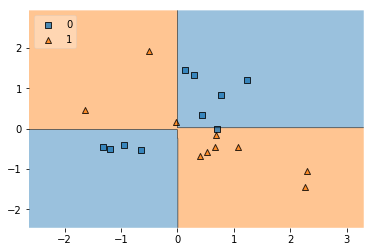

In [7]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 
# 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1.0,-1.0])
#print("このテストデータのラベル = ", predicted_label)

# Random Forest

アンサンブル学習には
・Bagging(バギング)  
・Boosting(ブースティング)  
・Stacking(スタッキング)  
Random Forestは決定木のBaggingによるアンサンブル学習
やはりこれもそれほど精度の高い手法ではない

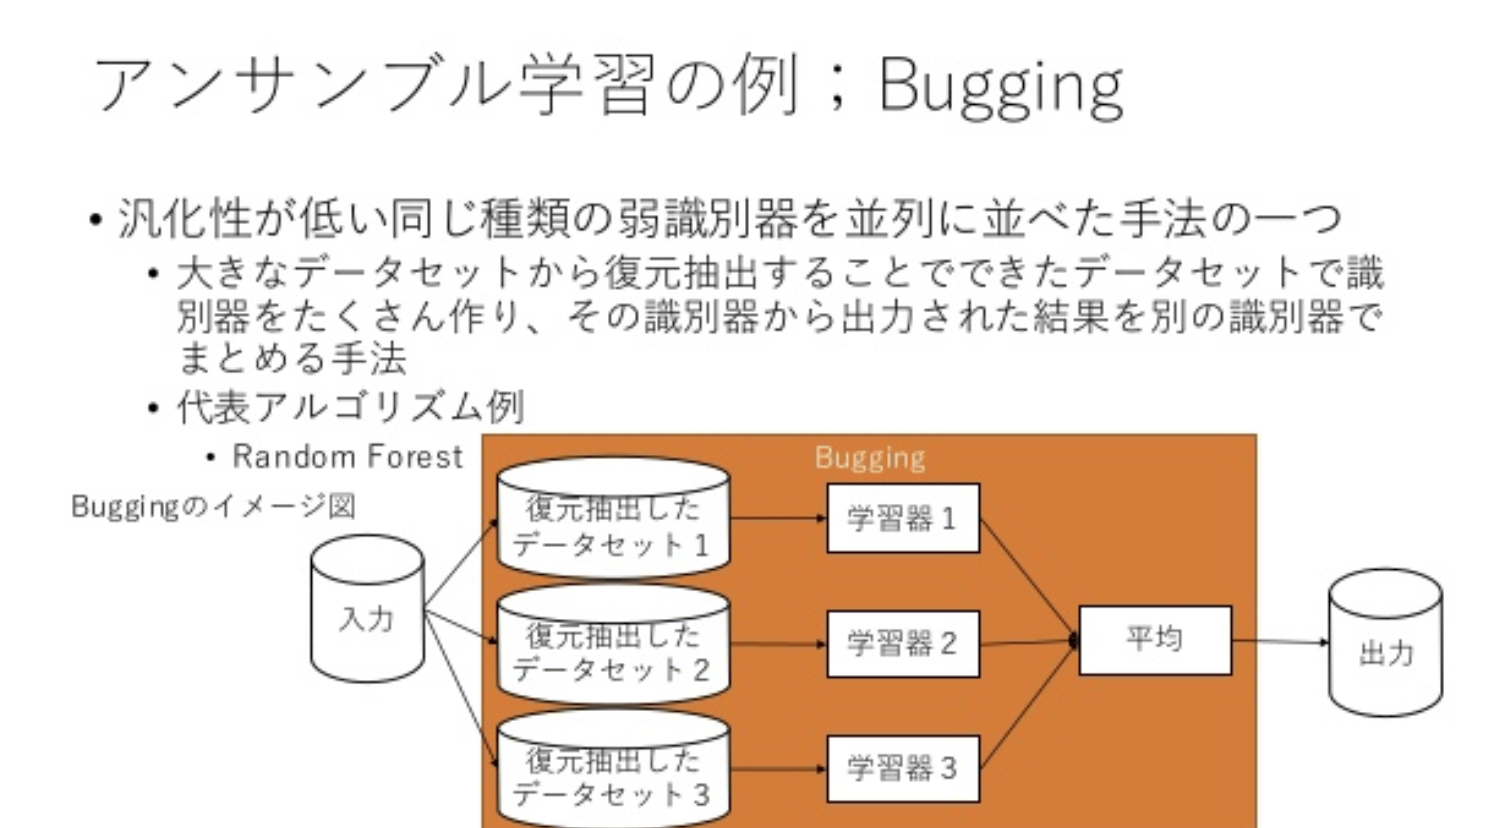

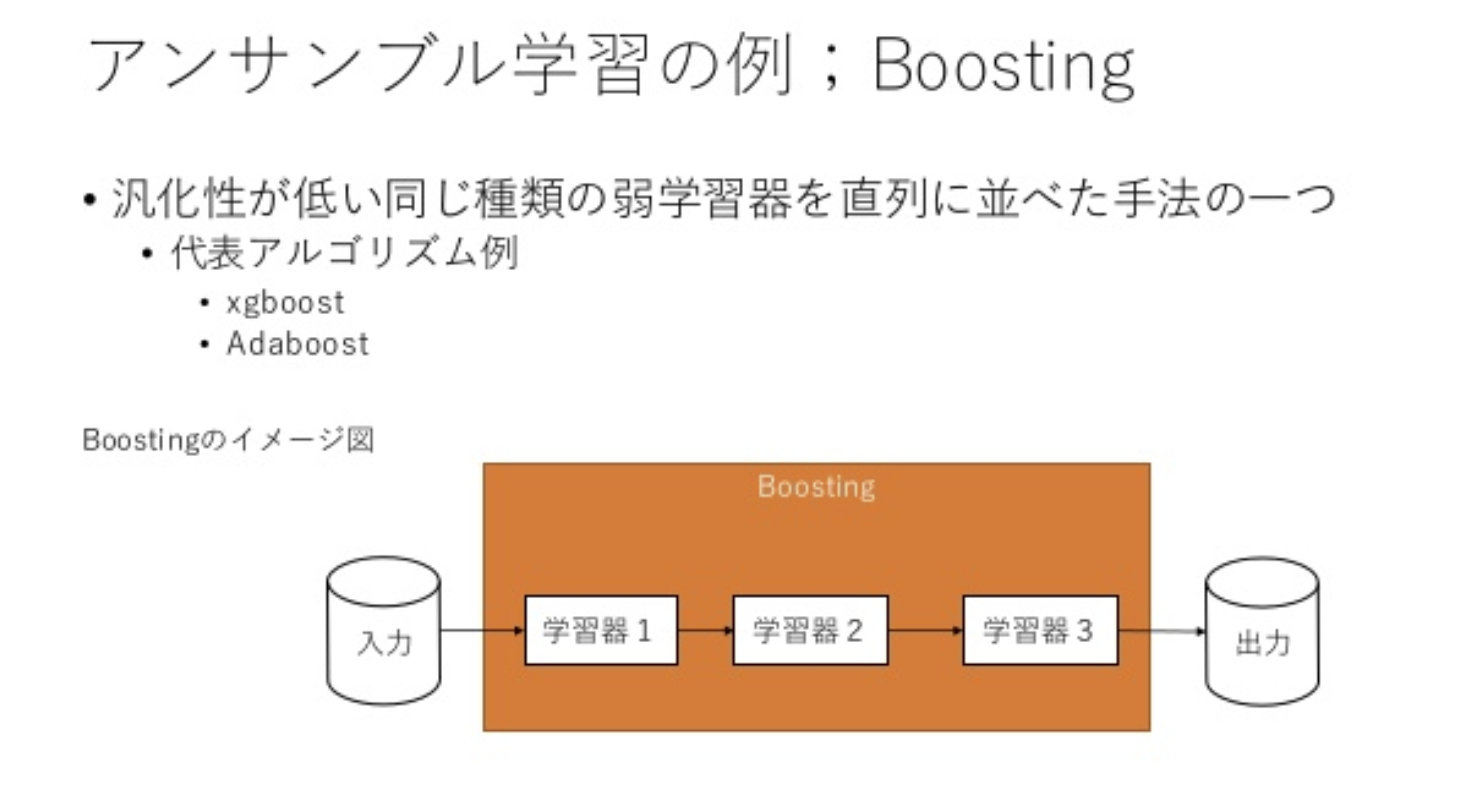

In [8]:
display_png(Image("./images/boost1.png"))
display_png(Image("./images/boost2.png"))

https://www.slideshare.net/yasunoriozaki12/kaggle-79541118

In [9]:
# 解説5：機械学習で分類する---------------------------------------------------
clf_result=ensemble.RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2,class_weight="balanced")
clf_result.fit(X_std, z)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [10]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())
 
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
print(test_label,pre)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

平均正解率 =  0.959736842105
正解率の標準偏差 =  0.0490498361526
[0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0] [0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0]
正答率 =  1.0


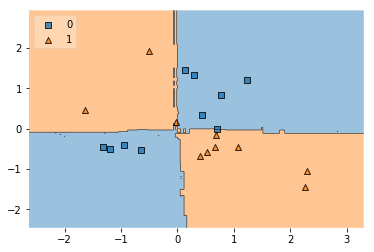

In [11]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 
# 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1.0,-1.0])
#print("このテストデータのラベル = ", predicted_label)

---

# XGboost

Boosting(ブースティング)  にはAda boostとGradient boostがあるがXGboostは後者を使っている  
Ada boostは間違った学習データに対してより重要度を上げて次の時刻 t で弱学習器を学習をする
Gradient boostは残差誤差にフィットするように予測器を修正する
Boostingとは、弱学習器をboostして、そのアルゴリズムよりも強い学習アルゴリズム  
ブースティングの一般的な考え方は、学習器を連続的に学習させて、より精度が向上するように修正していくこと  
学習した予測器をより良いものにするためには、単純に間違えたものにより注意を払って次の学習を行えばいいと考えられる(以下の図参照)。
Boostingでは決定木がよく用いられるが、決定木に限った話ではない

http://st-hakky.hatenablog.com/entry/2017/08/08/092031

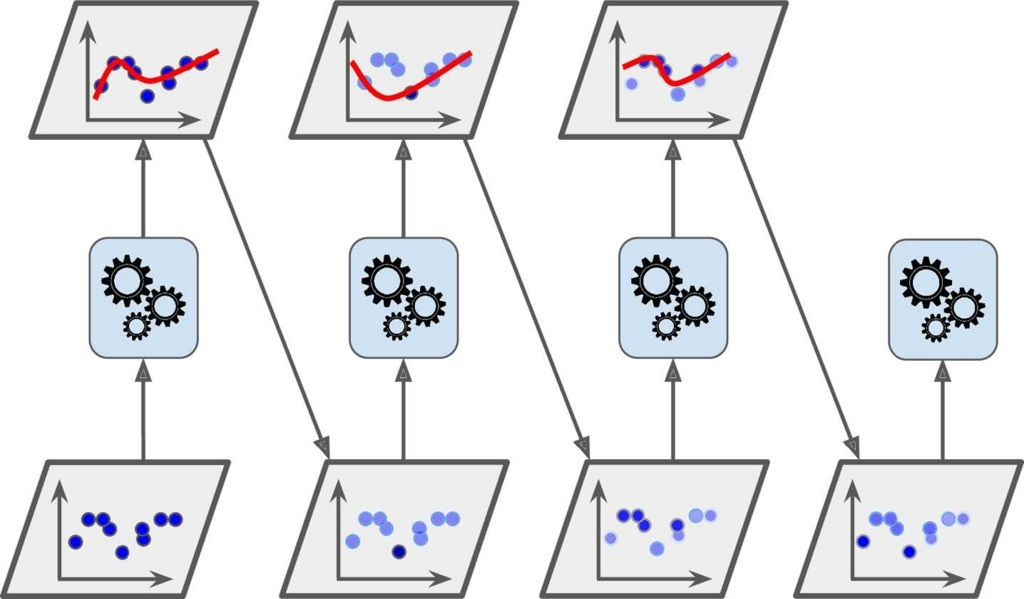

In [12]:
from IPython.display import Image, display_png, display_jpeg
display_jpeg(Image("./images/boost.jpg"))

Ada boost : http://st-hakky.hatenablog.com/entry/2017/08/08/025846  
Gradient boost : http://st-hakky.hatenablog.com/entry/2017/08/08/092031

In [13]:
# !conda install -c mndrake xgboost -y
import xgboost as xgb

詳しい使い方はこちら
https://xgboost.readthedocs.io/en/latest/parameter.html

In [14]:
clf_result=xgb.XGBRegressor()
clf_result.fit(X_std, z)
# これでkernelが死ぬ場合はこちらを参考　https://qiita.com/TomHortons/items/7b22b6a2b9870a0986c7

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())
 
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
pre = pre.astype(np.int64)
ac_score=metrics.accuracy_score(test_label, pre)
print("正答率 = ",ac_score)

平均正解率 =  0.918719612989
正解率の標準偏差 =  0.134288186232
正答率 =  0.85


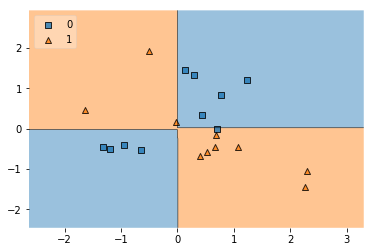

In [16]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 
# 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1.0,-1.0])
#print("このテストデータのラベル = ", predicted_label)